In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Dataset.csv')

In [3]:
df = dataset.copy()
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


## Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [ ]:
#drop these two features because they are IDs and aren't helpful
df = df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

In [ ]:
df.describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.00,4.09,2.61,0.00,2.00,4.00,6.00,8.00
transport_issue_l1y,25000.00,0.77,1.20,0.00,0.00,0.00,1.00,5.00
Competitor_in_mkt,25000.00,3.10,1.14,0.00,2.00,3.00,4.00,12.00
retail_shop_num,25000.00,4985.71,1052.83,1821.00,4313.00,4859.00,5500.00,11008.00
distributor_num,25000.00,42.42,16.06,15.00,29.00,42.00,56.00,70.00
flood_impacted,25000.00,0.10,0.30,0.00,0.00,0.00,0.00,1.00
flood_proof,25000.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
electric_supply,25000.00,0.66,0.47,0.00,0.00,1.00,1.00,1.00
dist_from_hub,25000.00,163.54,62.72,55.00,109.00,164.00,218.00,271.00
workers_num,24010.00,28.94,7.87,10.00,24.00,28.00,33.00,98.00


In [ ]:
df.describe(include='O')

,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
count,25000,25000,25000,25000,25000,24092
unique,2,3,4,6,2,5
top,Rural,Large,North,Zone 6,Company Owned,C
freq,22957,10169,10278,8339,13578,5501


In [ ]:
(df.isnull().sum() / df.shape[0]*100).reset_index().rename(columns={0:"missing_values(%)"})

,index,missing_values(%)
0,Location_type,0.000
1,WH_capacity_size,0.000
2,zone,0.000
3,WH_regional_zone,0.000
4,num_refill_req_l3m,0.000
5,transport_issue_l1y,0.000
6,Competitor_in_mkt,0.000
7,retail_shop_num,0.000
8,wh_owner_type,0.000
9,distributor_num,0.000


## Exploratory Data Analysis

Rural    22957
Urban     2043
Name: Location_type, dtype: int64


<AxesSubplot:ylabel='Location_type'>

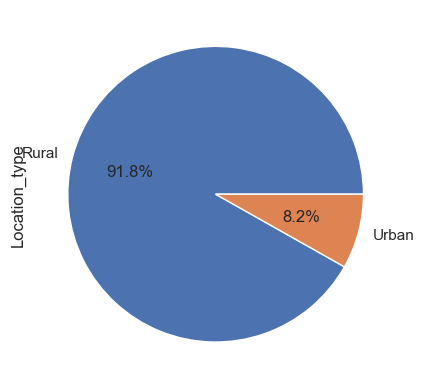

In [ ]:
print(df['Location_type'].value_counts())
df['Location_type'].value_counts().plot(kind='pie', autopct='%0.1f%%')

- 91.8% warehouses are located in Rural areas.
- 8.2% warehouses are located in Urban areas.

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


<AxesSubplot:ylabel='WH_capacity_size'>

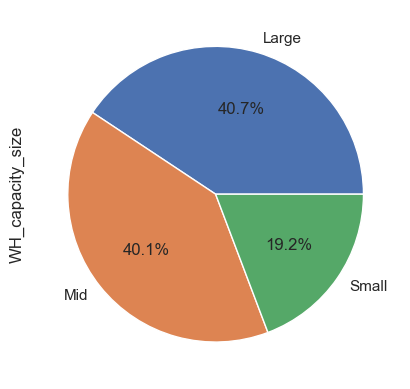

In [ ]:
print(df['WH_capacity_size'].value_counts())
df['WH_capacity_size'].value_counts().plot(kind='pie', autopct='%0.1f%%')

- There are approx 40% Large warehouses and 40% Mid warehouses
- only 20% warehouses are small in size
- The difference in capacity is nearly negligible.

- North zone has highest number of warehouses approx 41%
- East has lowest number of warehouses, only 1.7%
- West has 31.7% and South has 25.4% warehouses.

<AxesSubplot:xlabel='dist_from_hub', ylabel='Count'>

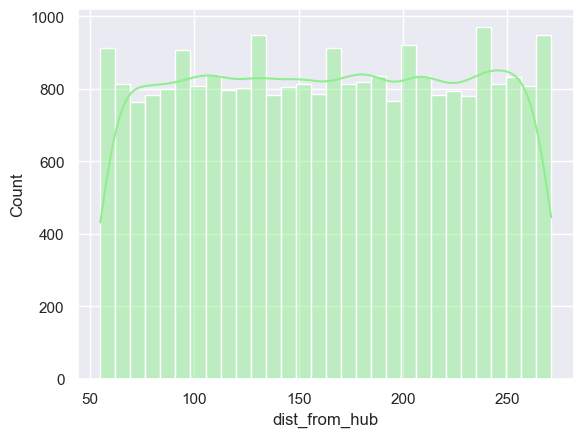

In [ ]:
sns.histplot(df['dist_from_hub'], kde=True, bins=30, color='lightgreen')

<AxesSubplot:>

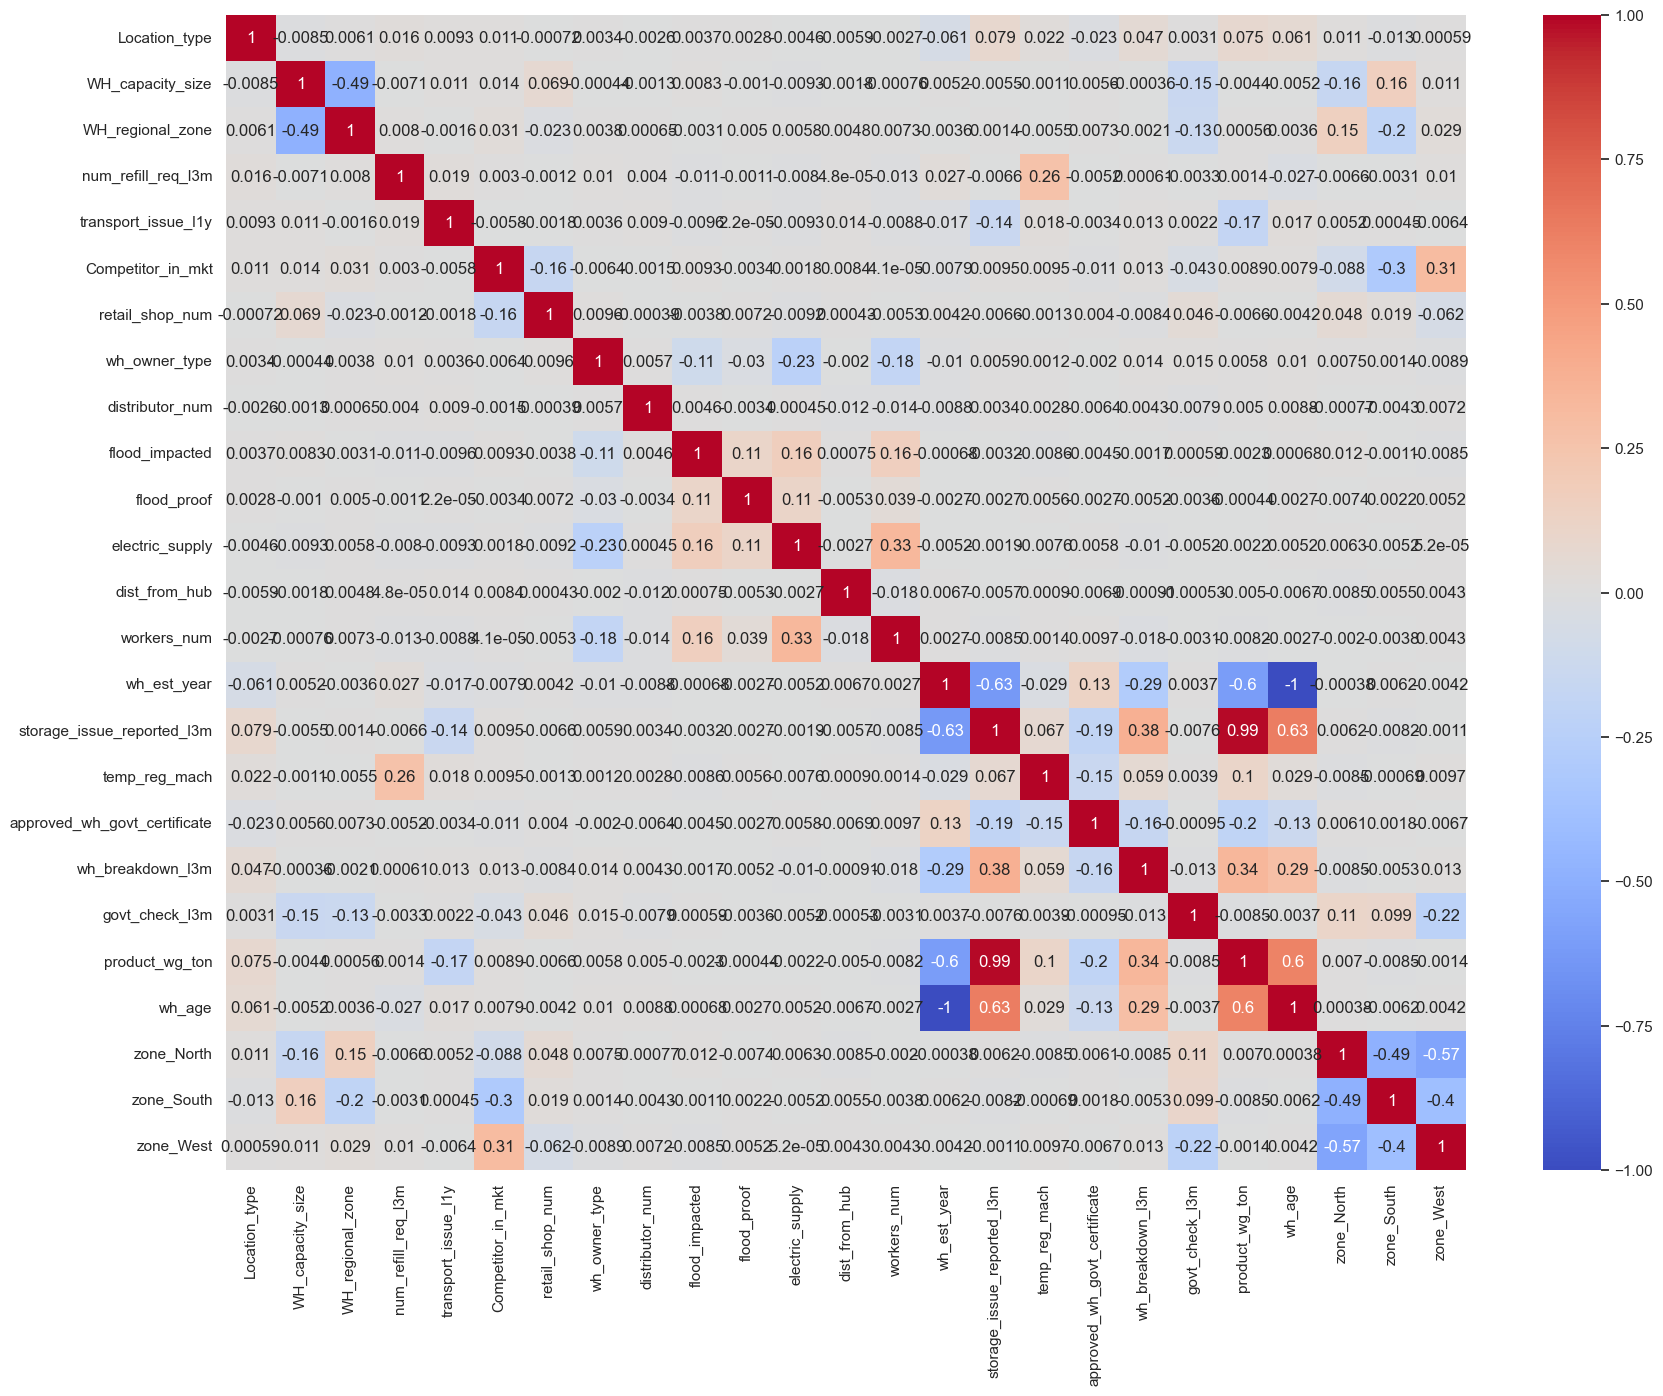

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')